In [1]:
import pandas as pd
import sys , numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


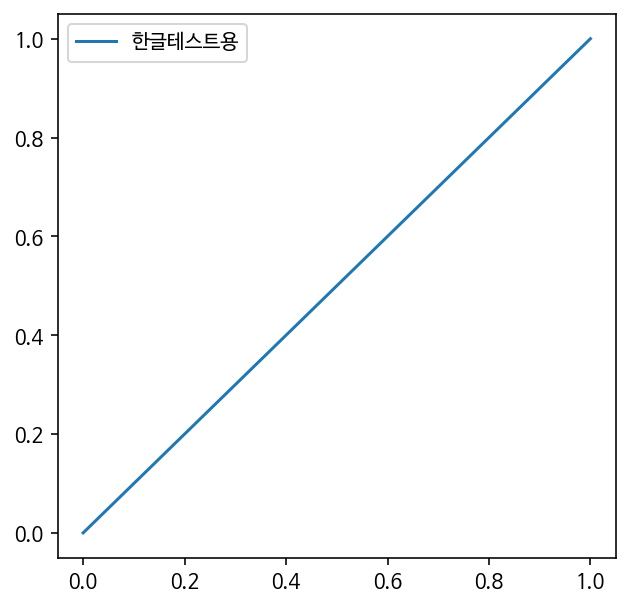

In [3]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

# 각 기간에 따른 권역별 자동차 입출구 변수에 대한 EDA

In [4]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/제주/자동차입출/201901.csv',encoding='cp949')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/제주/train_df_noNAN.csv')

In [5]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [6]:
df.head()

,권역,입출구,2019.01.31,2019.01.30,2019.01.29,2019.01.28,2019.01.27,2019.01.26,2019.01.25,2019.01.24,2019.01.23,2019.01.22,2019.01.21,2019.01.20,2019.01.19,2019.01.18,2019.01.17,2019.01.16,2019.01.15,2019.01.14,2019.01.13,2019.01.12,2019.01.11,2019.01.10,2019.01.09,2019.01.08,2019.01.07,2019.01.06,2019.01.05,2019.01.04,2019.01.03,2019.01.02,2019.01.01
0,수도권본부,입구,"1,455,681","1,458,297","1,439,086","1,438,418","1,077,457","1,324,972","1,486,717","1,424,874","1,417,528","1,409,401","1,418,925","1,072,057","1,323,834","1,478,494","1,397,506","1,390,740","1,399,335","1,406,504","1,046,940","1,313,684","1,471,345","1,400,574","1,384,380","1,395,339","1,400,054","996,512","1,265,192","1,457,114","1,389,951","1,354,531","1,032,700"
1,수도권본부,출구,"1,469,331","1,476,005","1,453,419","1,420,907","1,092,036","1,316,482","1,507,155","1,442,446","1,427,212","1,423,129","1,409,980","1,092,681","1,313,447","1,495,735","1,411,943","1,406,734","1,414,122","1,394,246","1,078,912","1,298,750","1,489,691","1,414,991","1,401,471","1,403,470","1,391,300","1,019,594","1,252,557","1,472,630","1,398,824","1,343,932","1,065,670"
2,수도권본부,합계,"2,925,012","2,934,302","2,892,505","2,859,325","2,169,493","2,641,454","2,993,872","2,867,320","2,844,740","2,832,530","2,828,905","2,164,738","2,637,281","2,974,229","2,809,449","2,797,474","2,813,457","2,800,750","2,125,852","2,612,434","2,961,036","2,815,565","2,785,851","2,798,809","2,791,354","2,016,106","2,517,749","2,929,744","2,788,775","2,698,463","2,098,370"
3,강원본부,입구,"176,423","188,353","187,292","187,488","208,724","222,748","208,450","187,946","185,846","186,187","188,053","221,321","232,112","212,734","184,048","180,689","181,975","187,121","212,548","221,926","204,337","179,266","176,191","178,565","178,352","189,556","202,174","200,038","178,526","181,856","270,907"
4,강원본부,출구,"172,265","183,894","182,838","185,921","187,519","233,241","214,335","186,346","182,649","182,510","185,890","201,899","243,340","220,373","183,189","178,350","178,175","185,763","194,324","235,046","211,603","178,632","172,717","175,767","178,895","168,381","213,512","203,974","175,993","176,649","258,243"


---

In [7]:
# melt함수를 활용한 시계열 데이터 변형 예시
df.melt(id_vars=['권역','입출구'],var_name='date').sort_values(['date','권역']).head()

,권역,입출구,date,value
813,강원본부,입구,2019.01.01,"270,907"
814,강원본부,출구,2019.01.01,"258,243"
815,강원본부,합계,2019.01.01,"529,150"
822,광주전남본부,입구,2019.01.01,"239,252"
823,광주전남본부,출구,2019.01.01,"222,832"


In [8]:
mod = sys.modules[__name__]
for year in [201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004]:
   #동적 할당
   df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/제주/자동차입출/{}.csv'.format(year),encoding='cp949')
   df = df.melt(id_vars=['권역','입출구'],var_name='date').sort_values(['date','권역'])
   setattr(mod,'df_{}'.format(year),df)

car_df= pd.concat([df_201901,df_201902,df_201903,df_201904,df_201905,df_201906,df_201907,df_201908,df_201909,df_201910,df_201911,df_201912,df_202001,df_202002,df_202003,df_202004])

In [9]:
car_df.head()

,권역,입출구,date,value
813,강원본부,입구,2019.01.01,"270,907"
814,강원본부,출구,2019.01.01,"258,243"
815,강원본부,합계,2019.01.01,"529,150"
822,광주전남본부,입구,2019.01.01,"239,252"
823,광주전남본부,출구,2019.01.01,"222,832"


In [10]:
car_df['date']=pd.to_datetime(car_df['date'])

In [11]:
car_df=car_df.reset_index(drop=True)

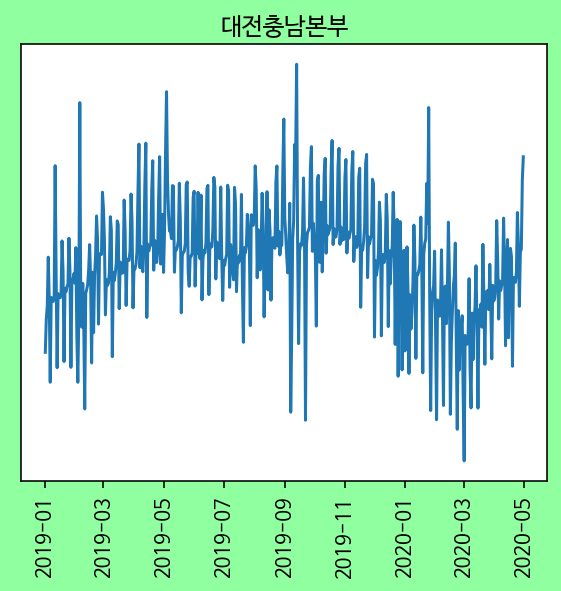

In [63]:
# 권역별 차량 입출구 데이터 그래프 예시

fig = plt.figure(figsize=(4,4))
fig.patch.set_facecolor('xkcd:mint green')
plt.plot(car_df[(car_df['권역'] == '대전충남본부')&((car_df['입출구'] == '입구'))][['date','value']]['date'],
         car_df[(car_df['권역'] == '대전충남본부')&((car_df['입출구'] == '입구'))][['date','value']]['value'])
plt.xticks(rotation =90)
plt.yticks([])
plt.tight_layout()
plt.title('대전충남본부')
plt.show()

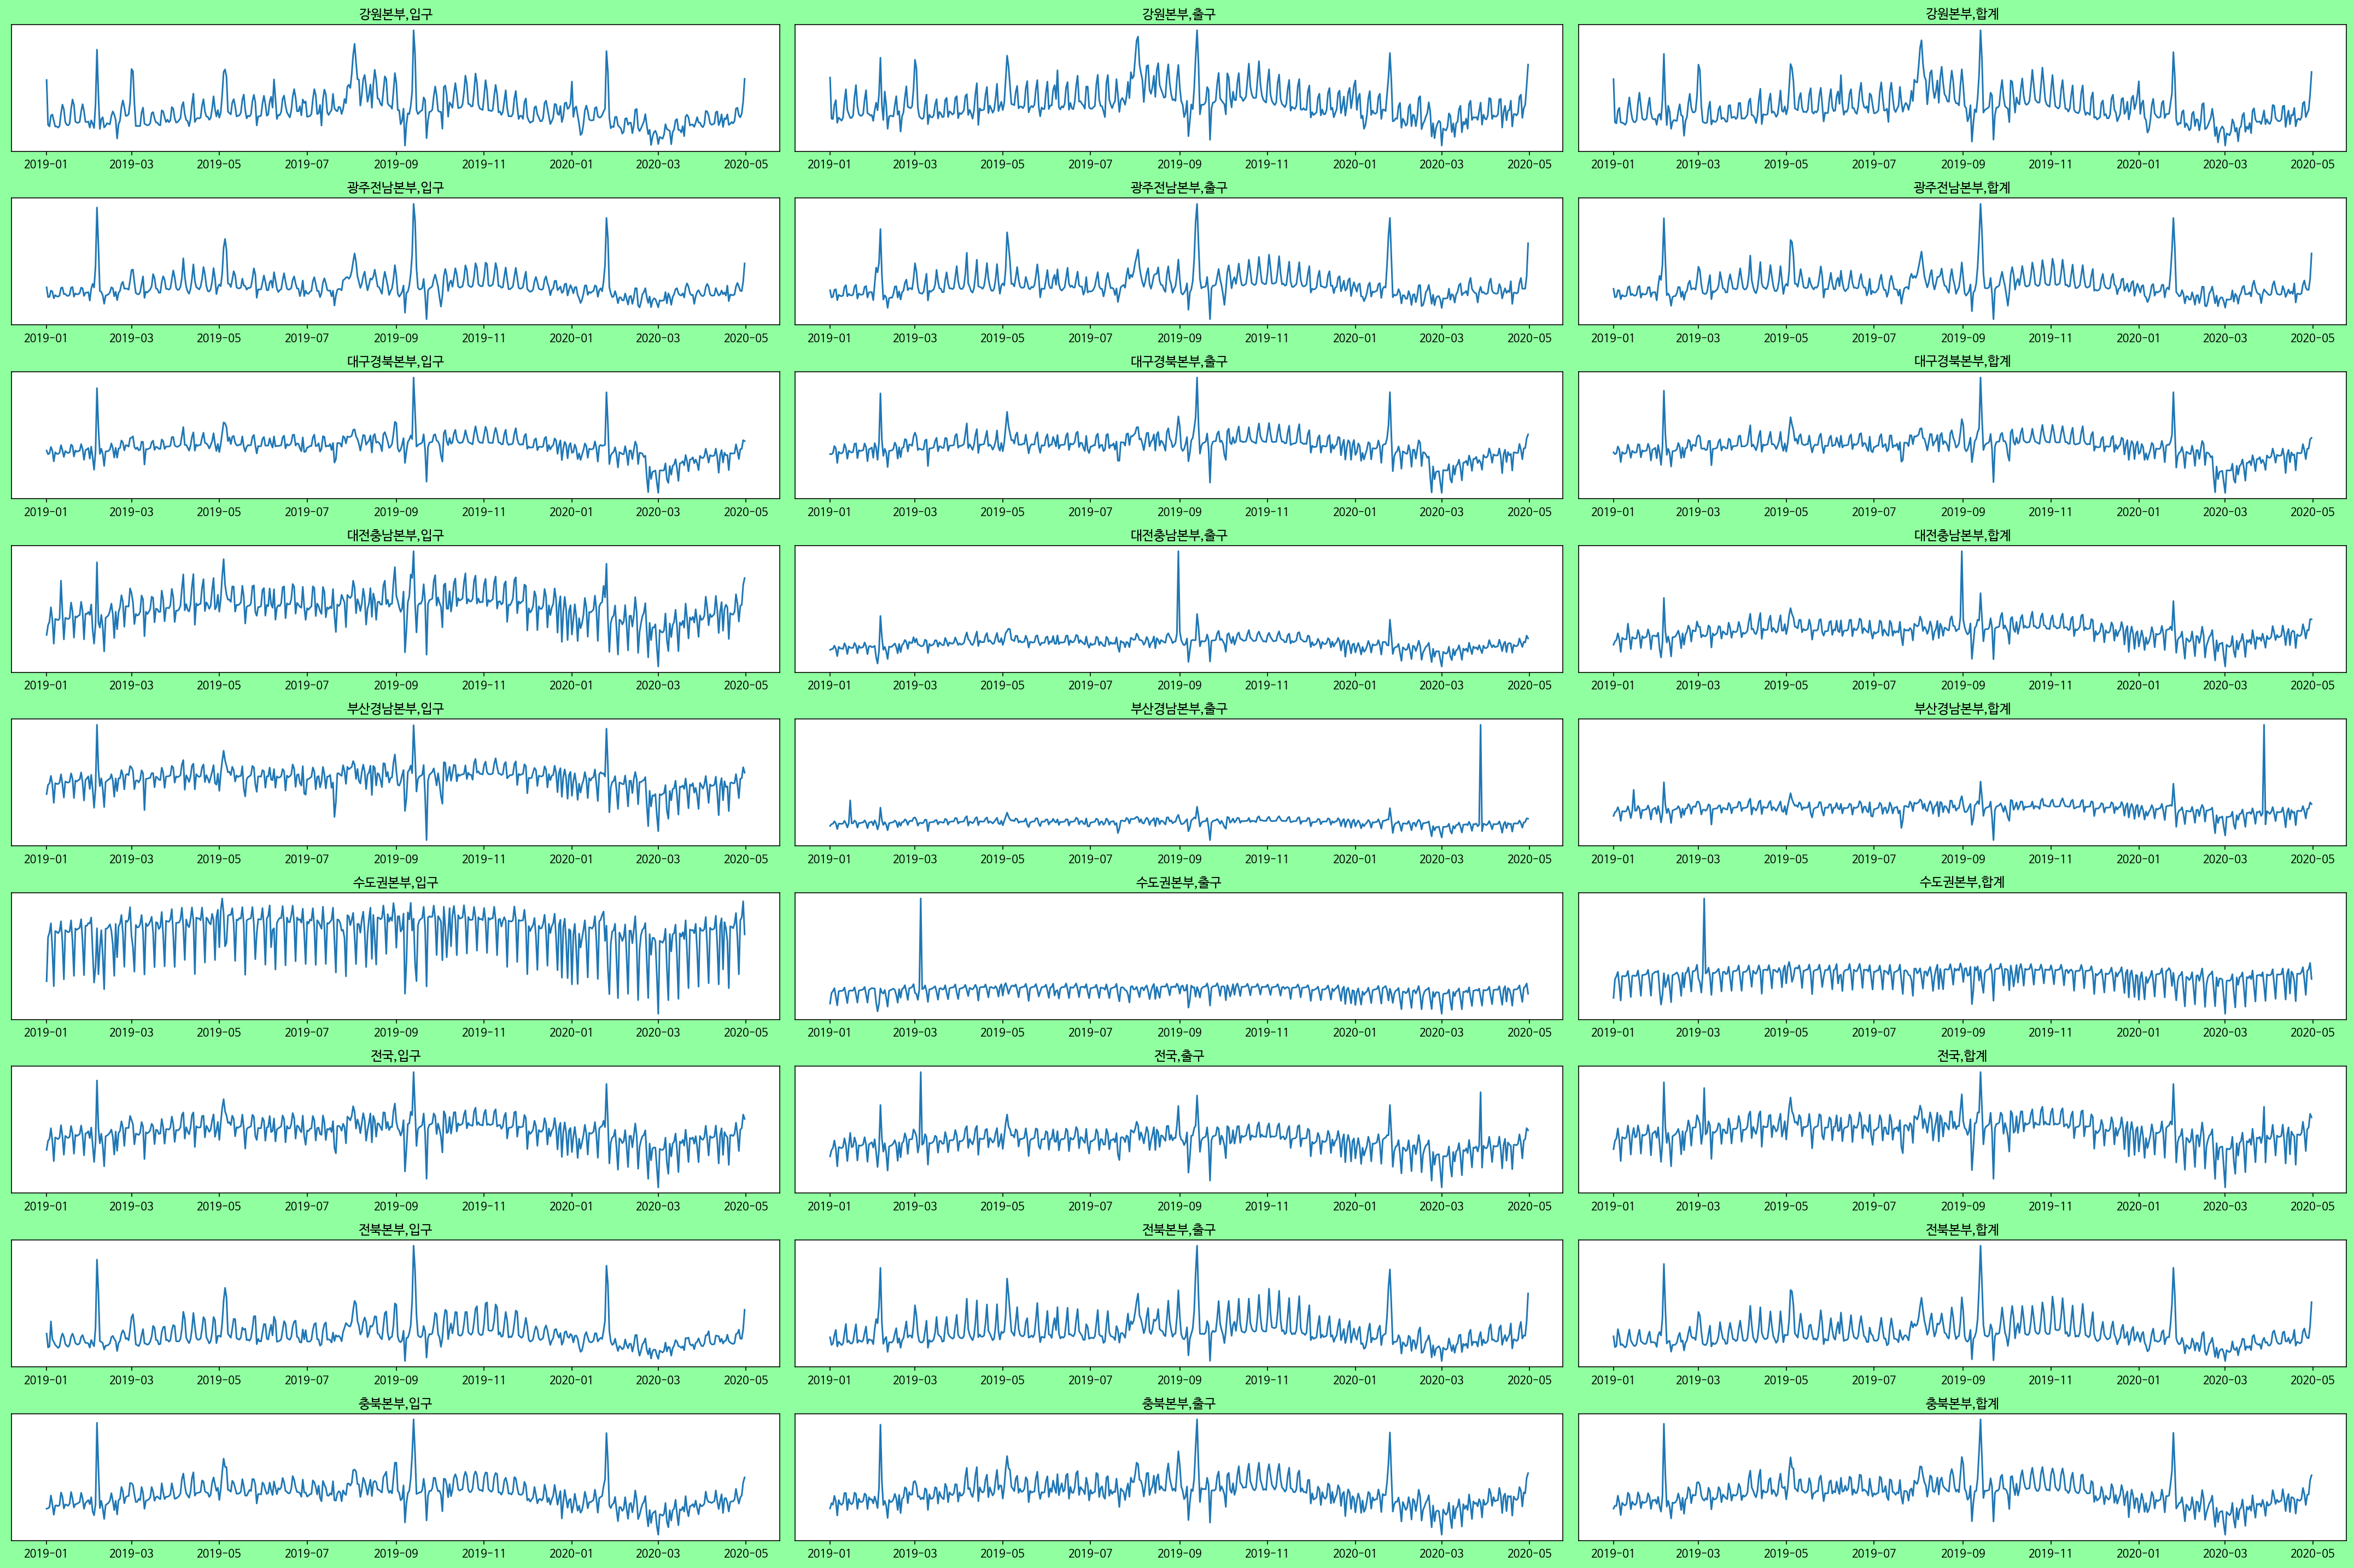

In [62]:
# 권역별 차량 입구,출구,합계를 권역별로 한번에 출력

fig,axs = plt.subplots(9, 3) # 9개의 지역, 3개의 데이터(입,출,합)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(car_df.권역.unique()):

  axs[idx,0].plot(car_df[(car_df['권역'] == city)&((car_df['입출구'] == '입구'))][['date','value']]['date'],
                  car_df[(car_df['권역'] == city)&((car_df['입출구'] == '입구'))][['date','value']]['value'])
  axs[idx,0].title.set_text('%s,%s'%(city,'입구'))
  axs[idx,0].set_yticks([])
  
  axs[idx,1].plot(car_df[(car_df['권역'] == city)&((car_df['입출구'] == '출구'))][['date','value']]['date'],
                  car_df[(car_df['권역'] == city)&((car_df['입출구'] == '출구'))][['date','value']]['value'])
  axs[idx,1].title.set_text('%s,%s'%(city,'출구'))
  axs[idx,1].set_yticks([])
  
  axs[idx,2].plot(car_df[(car_df['권역'] == city)&((car_df['입출구'] == '합계'))][['date','value']]['date'],
                  car_df[(car_df['권역'] == city)&((car_df['입출구'] == '합계'))][['date','value']]['value'])
  axs[idx,2].title.set_text('%s,%s'%(city,'합계'))
  axs[idx,2].set_yticks([])

plt.tight_layout()
plt.show()

자동차 입출 데이터가 권역별로 격차가 뚜렷하게 나타나는 것으로 보인다. 또한 코로나19 발생 이후, 입출 추이가 감소추세로 보이고 있으나 다시 증가하는 경향을 보이는 곳도 있다.

In [14]:
car_df.권역.unique()

array(['강원본부', '광주전남본부', '대구경북본부', '대전충남본부', '부산경남본부', '수도권본부', '전국',
       '전북본부', '충북본부'], dtype=object)

In [15]:
car_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13117    False
13118    False
13119    False
13120    False
13121    False
Length: 13122, dtype: bool

In [16]:
#car_df.to_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/제주/자동차입출/car_df.csv', encoding='utf-8-sig',index=False)

---

원본 데이터에 차량 입출구 데이터를 삽입해서 분석해보자.

In [17]:
car_df.권역.unique()

array(['강원본부', '광주전남본부', '대구경북본부', '대전충남본부', '부산경남본부', '수도권본부', '전국',
       '전북본부', '충북본부'], dtype=object)

In [18]:
data['CARD_SIDO_NM'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [19]:
# 권역 dict 생성 및 권역변수 생성
state = {'강원':'강원본부',
         '경기':'수도권본부',
         '경남':'부산경남본부',
         '경북':'대구경북본부',
         '광주':'광주전남본부',
         '대구':'대구경분본부',
         '대전':'대전충남본부',
         '부산':'부산경남본부',
         '서울':'수도권본부',
         '세종':'대전충남본부',
         '울산':'부산경남본부',
         '인천':'수도권본부',
         '전남':'광주전남본부',
         '전북':'전분본부',
         '제주':'광주전남본부',
         '충남':'대전충남본부',
         '충북':'대구경북본부'}

data['권역'] = data['CARD_SIDO_NM'].map(state)

In [20]:
# car_df date 전처리
car_df['REG_YYMM'] = car_df['date'].astype(str).apply(lambda x: ''.join(x.split('-')[:2]))

In [21]:
print(car_df.dtypes)
car_df.head()

권역                  object
입출구                 object
date        datetime64[ns]
value               object
REG_YYMM            object
dtype: object


,권역,입출구,date,value,REG_YYMM
0,강원본부,입구,2019-01-01,"270,907",201901
1,강원본부,출구,2019-01-01,"258,243",201901
2,강원본부,합계,2019-01-01,"529,150",201901
3,광주전남본부,입구,2019-01-01,"239,252",201901
4,광주전남본부,출구,2019-01-01,"222,832",201901


value값이 object로 지정되어 있기 때문에 type을 변경해야 한다.

In [22]:
car_df['value'] = car_df['value'].apply(lambda x: x.replace(',','')).astype(int)
car_df['value'].dtypes

dtype('int64')

In [23]:
car_df_mean = car_df.groupby(['REG_YYMM','권역','입출구'])['value'].mean().reset_index()
car_df_mean['REG_YYMM'] = car_df_mean['REG_YYMM'].astype('int64')

In [24]:
merge_df=data.merge(car_df_mean[car_df_mean['입출구']=='입구'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'입구평균'})\
.merge(car_df_mean[car_df_mean['입출구']=='출구'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'출구평균'})\
.merge(car_df_mean[car_df_mean['입출구']=='합계'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'합계평균'})

In [25]:
merge_df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,권역,입구평균,출구평균,합계평균
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,강원본부,196830.709677,194588.16129,391418.870968
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,강원본부,196830.709677,194588.16129,391418.870968
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,강원본부,196830.709677,194588.16129,391418.870968
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,강원본부,196830.709677,194588.16129,391418.870968
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,강원본부,196830.709677,194588.16129,391418.870968


---

자동차 입출 평균과 AMT와의 관계 파악

           AMT      입구평균      출구평균      합계평균
AMT   1.000000  0.009143  0.009375  0.009262
입구평균  0.009143  1.000000  0.999083  0.999769
출구평균  0.009375  0.999083  1.000000  0.999773
합계평균  0.009262  0.999769  0.999773  1.000000


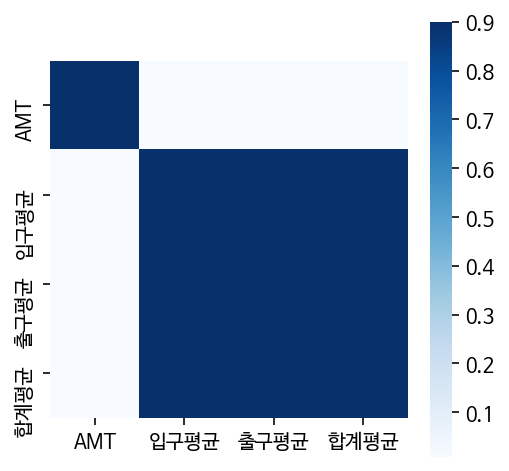

In [26]:
# 입출구와 AMT의 상관관계
corrmat = merge_df[['AMT','입구평균','출구평균','합계평균']].corr()
plt.subplots(figsize=(4,4))
sns.heatmap(corrmat,cbar=True,vmax=0.9,square=True,cmap='Blues')
print(corrmat)

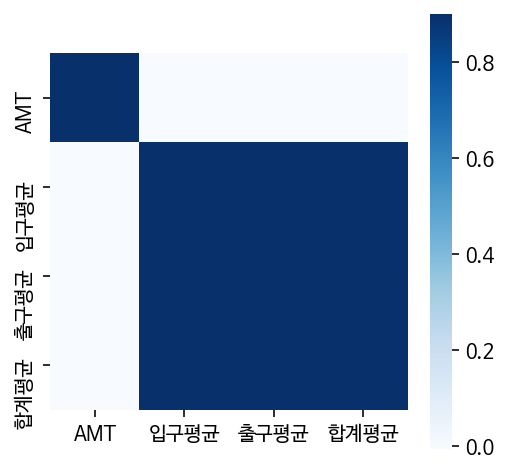

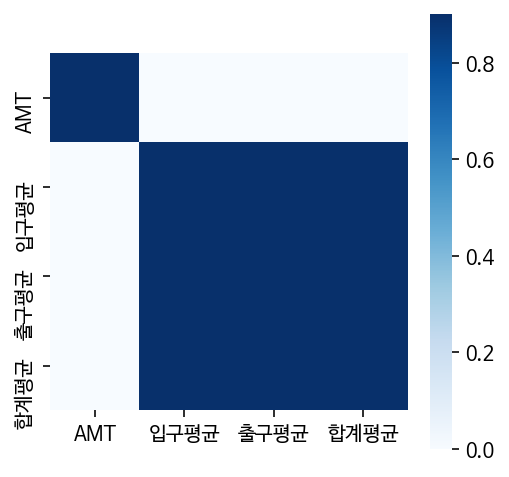

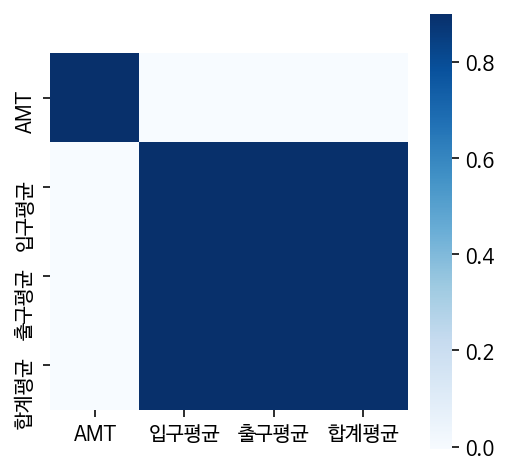

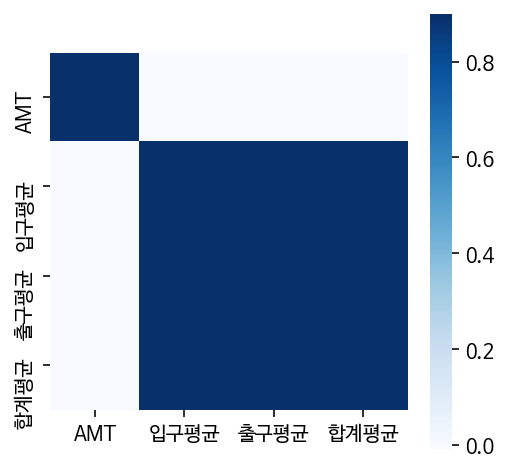

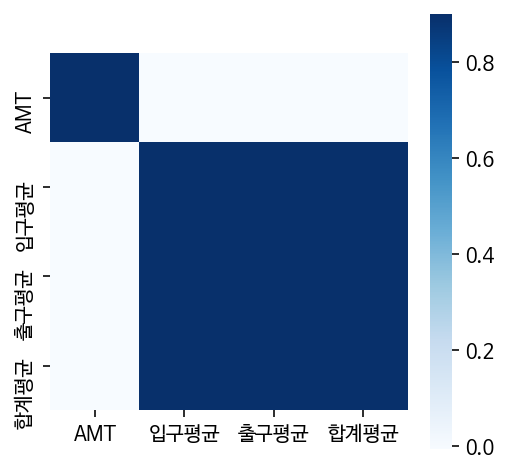

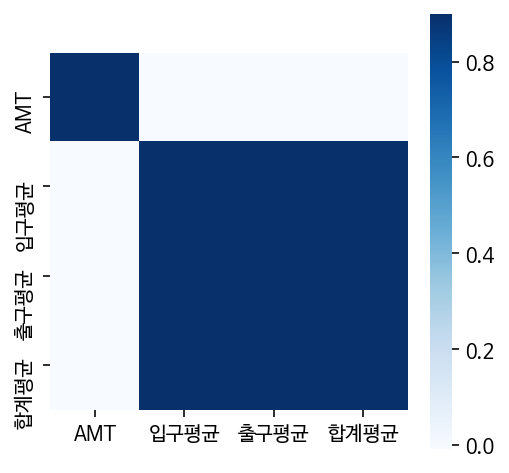

In [27]:
# 권역별 상관계수 살펴보기
for state in merge_df.권역.unique():
  corrmat = merge_df[merge_df.권역==state][['AMT','입구평균','출구평균','합계평균']].corr()
  plt.subplots(figsize=(4,4))
  sns.heatmap(corrmat,cbar=True,vmax=0.9,square=True,cmap='Blues')
  #print(corrmat)

각 평균 관측치들과 AMT와의 상관관계가 매우 낮음.
- 변수로 넣을지는 고민해 볼 필요가 있을 듯.
- 차량 입출구 데이터를 보면 최소값의 크기의 격차가 커보인다.
- 아니면 max() -min()을 사용해서 좀더 큰 격차를 만들어 보면 어떨까??

---

자동차 입출 최소값과 AMT와의 관계 파악

In [28]:
car_df_min = car_df.groupby(['REG_YYMM','권역','입출구'])['value'].min().reset_index()
car_df_min['REG_YYMM'] = car_df_min['REG_YYMM'].astype('int64')

In [29]:
merge_df=data.merge(car_df_min[car_df_min['입출구']=='입구'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'입구최소값'})\
.merge(car_df_min[car_df_min['입출구']=='출구'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'출구최소값'})\
.merge(car_df_min[car_df_min['입출구']=='합계'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'합계최소값'})

            AMT     입구최소값     출구최소값     합계최소값
AMT    1.000000  0.008674  0.008858  0.008763
입구최소값  0.008674  1.000000  0.995554  0.998898
출구최소값  0.008858  0.995554  1.000000  0.998586
합계최소값  0.008763  0.998898  0.998586  1.000000


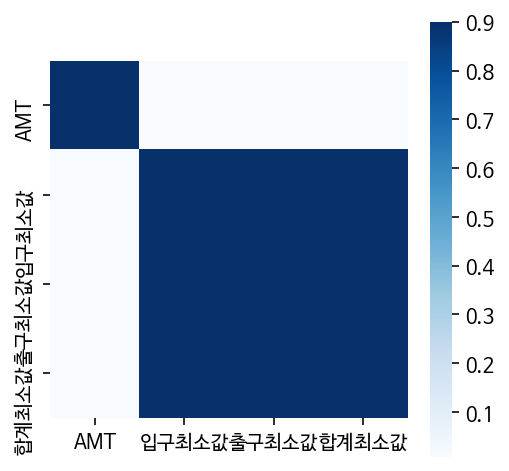

In [30]:
# 입출구와 AMT의 상관관계
corrmat = merge_df[['AMT','입구최소값','출구최소값','합계최소값']].corr()
plt.subplots(figsize=(4,4))
sns.heatmap(corrmat,cbar=True,vmax=0.9,square=True,cmap='Blues')
print(corrmat)

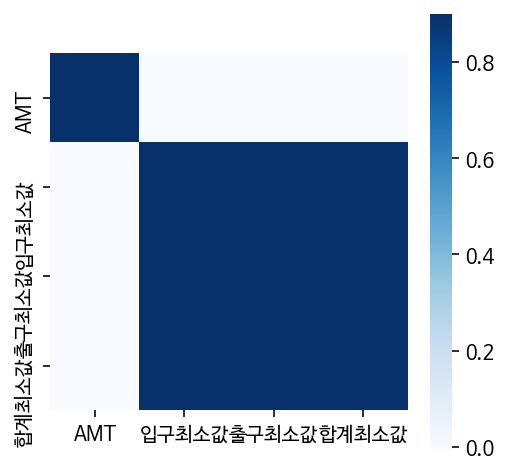

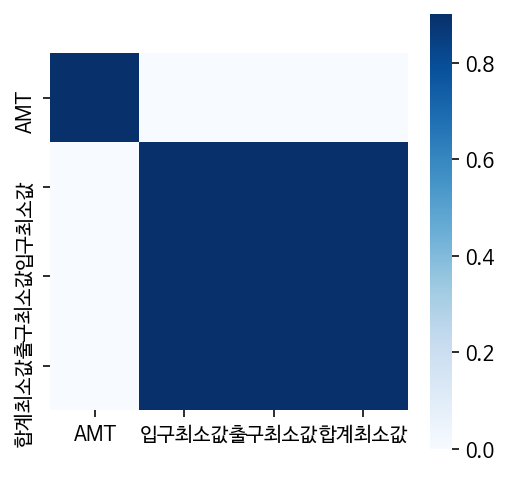

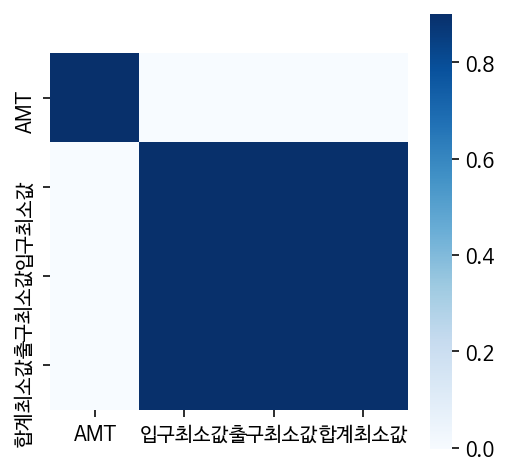

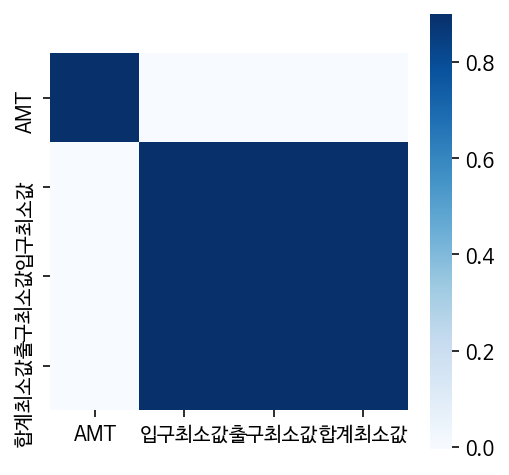

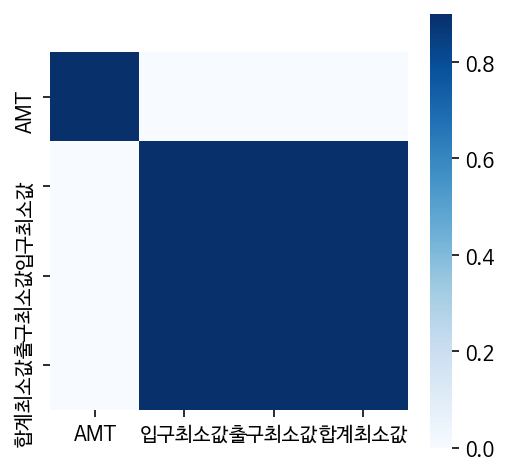

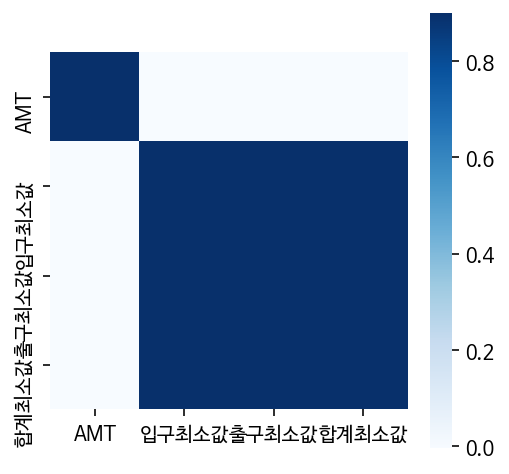

In [31]:
# 권역별 상관계수 살펴보기
for state in merge_df.권역.unique():
  corrmat = merge_df[merge_df.권역==state][['AMT','입구최소값','출구최소값','합계최소값']].corr()
  plt.subplots(figsize=(4,4))
  sns.heatmap(corrmat,cbar=True,vmax=0.9,square=True,cmap='Blues')
  #print(corrmat)

---

자동차 입출 최대값과 AMT와의 관계 파악

In [32]:
car_df_max = car_df.groupby(['REG_YYMM','권역','입출구'])['value'].max().reset_index()
car_df_max['REG_YYMM'] = car_df_max['REG_YYMM'].astype('int64')

In [33]:
merge_df=data.merge(car_df_max[car_df_max['입출구']=='입구'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'입구최대값'})\
.merge(car_df_max[car_df_max['입출구']=='출구'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'출구최대값'})\
.merge(car_df_max[car_df_max['입출구']=='합계'][['REG_YYMM','권역','value']],on=['REG_YYMM','권역']).rename(columns={'value':'합계최대값'})

            AMT     입구최대값     출구최대값     합계최대값
AMT    1.000000  0.009160  0.008263  0.009147
입구최대값  0.009160  1.000000  0.791431  0.933948
출구최대값  0.008263  0.791431  1.000000  0.957591
합계최대값  0.009147  0.933948  0.957591  1.000000


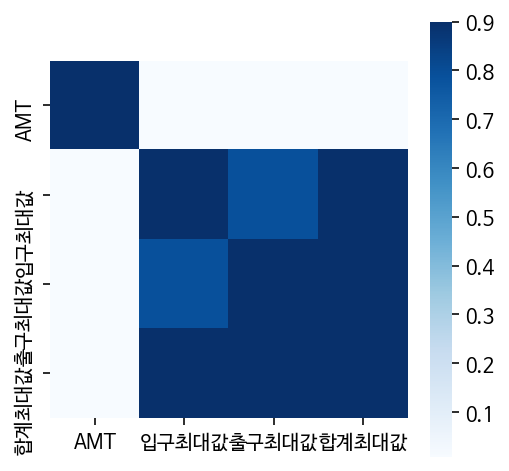

In [34]:
# 입출구와 AMT의 상관관계
corrmat = merge_df[['AMT','입구최대값','출구최대값','합계최대값']].corr()
plt.subplots(figsize=(4,4))
sns.heatmap(corrmat,cbar=True,vmax=0.9,square=True,cmap='Blues')
print(corrmat)

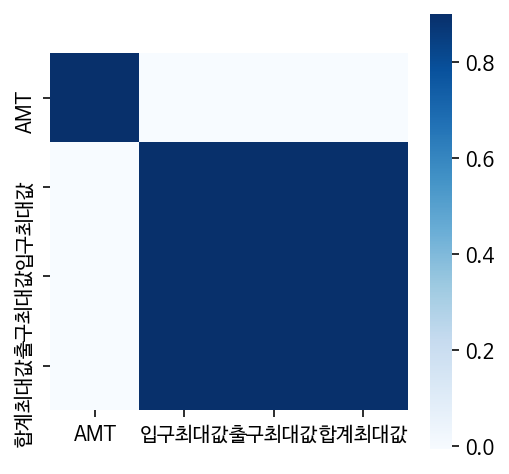

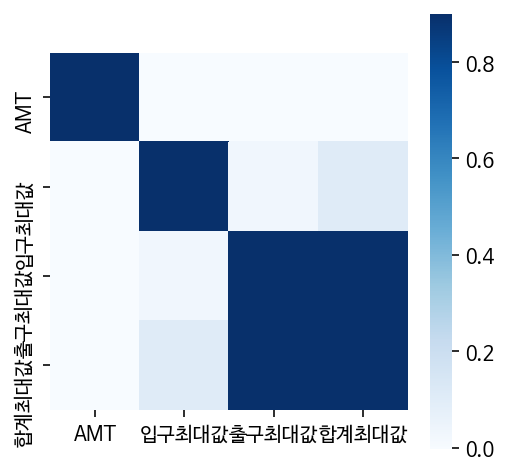

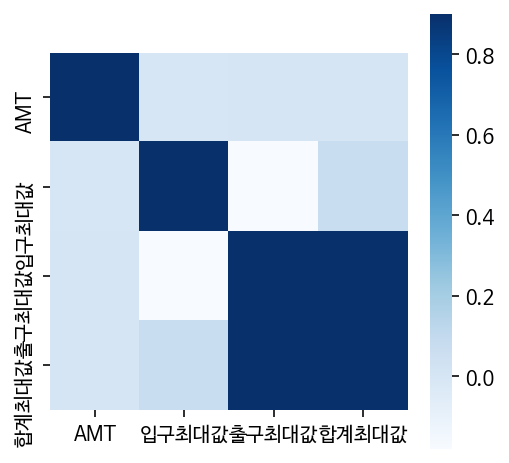

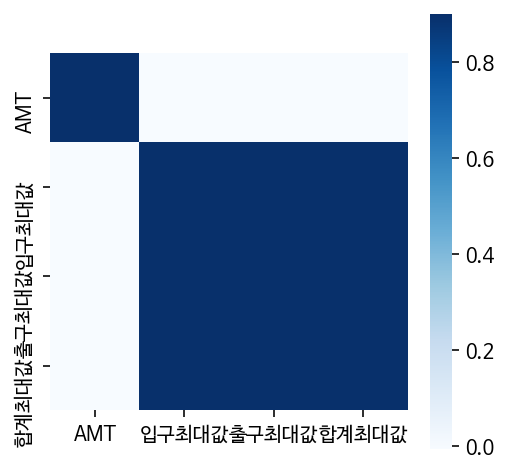

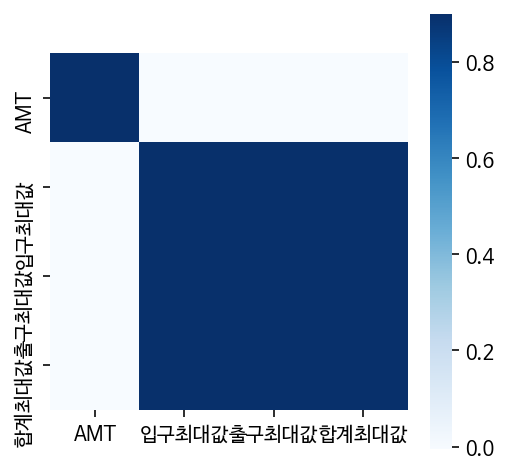

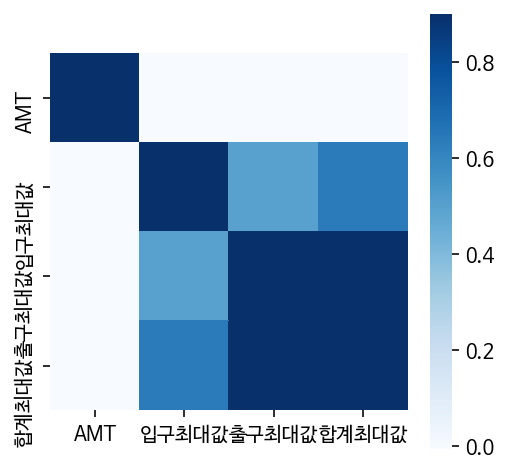

In [35]:
# 권역별 상관계수 살펴보기
for state in merge_df.권역.unique():
  corrmat = merge_df[merge_df.권역==state][['AMT','입구최대값','출구최대값','합계최대값']].corr()
  plt.subplots(figsize=(4,4))
  sns.heatmap(corrmat,cbar=True,vmax=0.9,square=True,cmap='Blues')
  #print(corrmat)

---

max() - min()

In [57]:
car_df_maxmin=car_df.groupby(['REG_YYMM','입출구','권역'])['value'].apply(lambda x: (x.max() - x.min())).reset_index(name='max-min')

In [59]:
merge_df=data.merge(car_df_maxmin[car_df_maxmin['입출구']=='입구'][['REG_YYMM','권역','max-min']],on=['REG_YYMM','권역']).rename(columns={'max-min':'입구max-min'})\
.merge(car_df_maxmin[car_df_maxmin['입출구']=='출구'][['REG_YYMM','권역','max-min']],on=['REG_YYMM','권역']).rename(columns={'max-min':'출구max-min'})\
.merge(car_df_maxmin[car_df_maxmin['입출구']=='합계'][['REG_YYMM','권역','max-min']],on=['REG_YYMM','권역']).rename(columns={'max-min':'합계max-min'})

                AMT  입구max-min  출구max-min  합계max-min
AMT        1.000000   0.008742   0.005398   0.007326
입구max-min  0.008742   1.000000   0.422516   0.675767
출구max-min  0.005398   0.422516   1.000000   0.953121
합계max-min  0.007326   0.675767   0.953121   1.000000


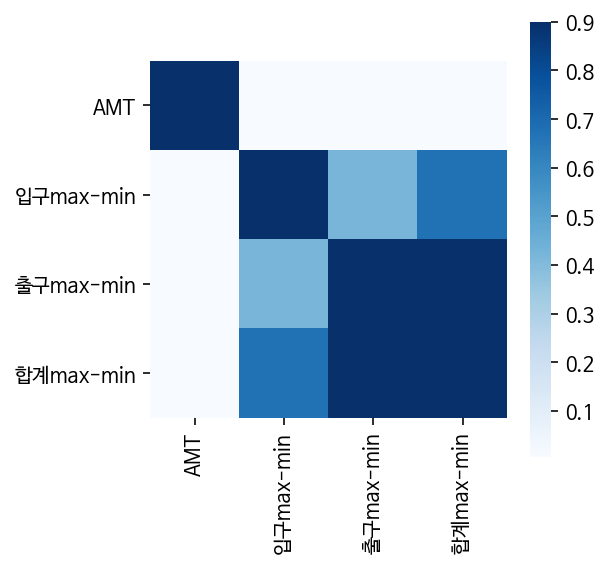

In [60]:
# 입출구와 AMT의 상관관계
corrmat = merge_df[['AMT','입구max-min','출구max-min','합계max-min']].corr()
plt.subplots(figsize=(4,4))
sns.heatmap(corrmat,cbar=True,vmax=0.9,square=True,cmap='Blues')
print(corrmat)

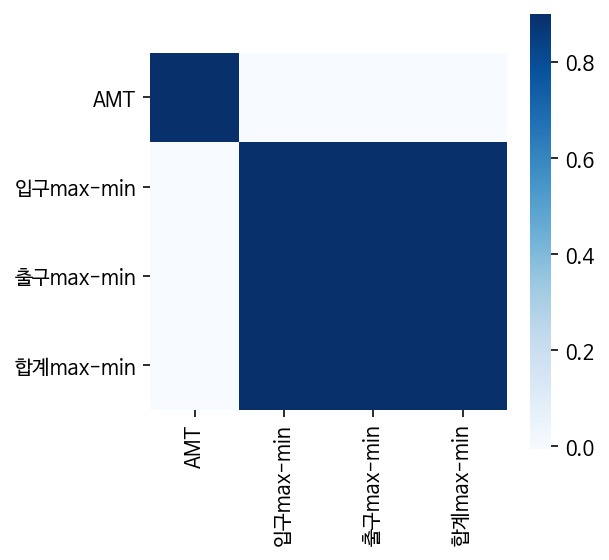

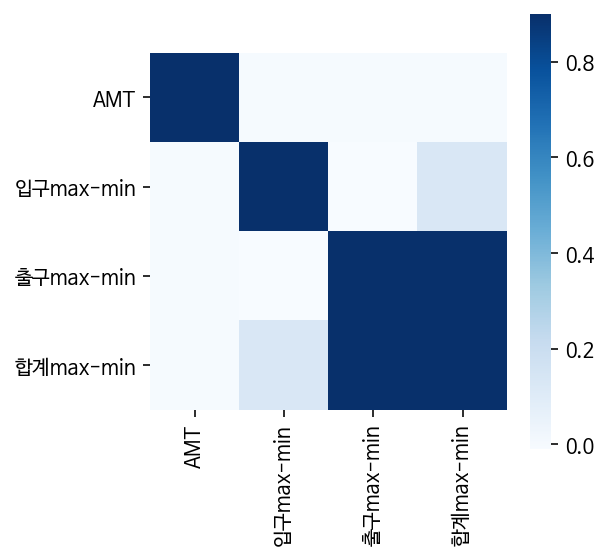

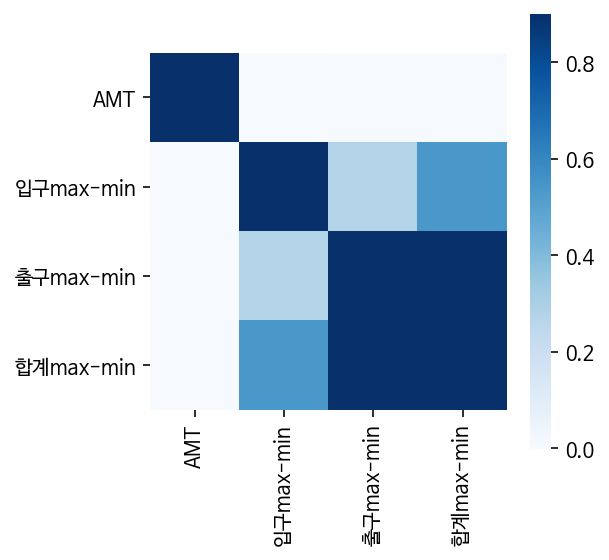

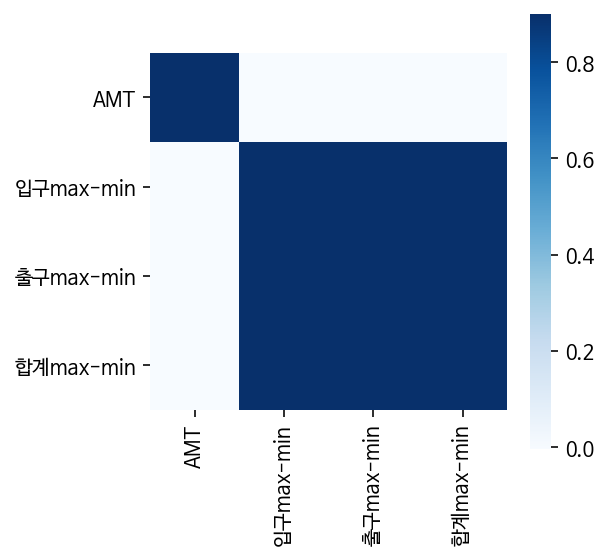

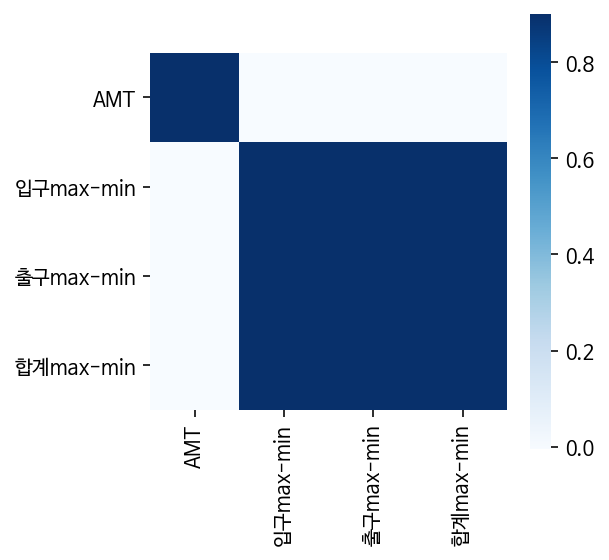

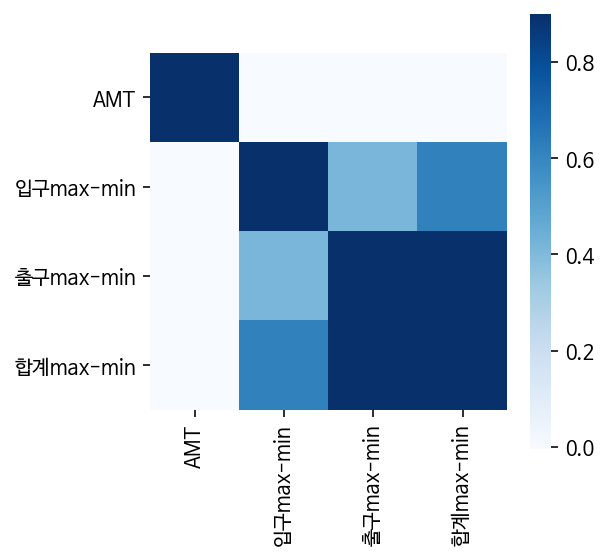

In [61]:
# 권역별 상관계수 살펴보기
for state in merge_df.권역.unique():
  corrmat = merge_df[merge_df.권역==state][['AMT','입구max-min','출구max-min','합계max-min']].corr()
  plt.subplots(figsize=(4,4))
  sns.heatmap(corrmat,cbar=True,vmax=0.9,square=True,cmap='Blues')
  #print(corrmat)

---

차량 입출구 데이터에 대한 고찰
- 우선 평균,max(),min(), max()-min()으로 월별 수치를 뽑고 AMT와 비교를 해본 결과는 상관관계가 크게 나타나지 않고 있다.(이 데이터를 파생변수로 써도 될지 고민이 좀 된다.)